<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/05%20Deep%20Learning/notebooks/2-Fully_Connected_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Totalmente Conectadas

**MultiLayer Perceptron (MLP)**

Benchmark actual: [An Ensemble of Simple Convolutional Neural Network Models for MNIST Digit Recognition, 2020](https://github.com/ansh941/MnistSimpleCNN) 99.87% accuracy

## 1. El conjunto de datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

y_test_original = y_test.copy()  # Hacemos una copia del 'y_test', la usaremos al final

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Visualizamos 6 ejemplos, junto con sus etiquetas

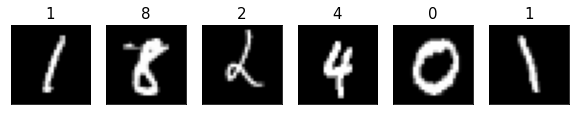

In [ ]:
# ------ Obtenemos algunos índices aleatorios:
some_idxs = np.random.choice(list(range(y_train.shape[0])),size=6,replace=False)

fig, axes = plt.subplots(ncols=6, sharex=False,
			 sharey=True, figsize=(10, 4))
for i,idx in enumerate(some_idxs):
	axes[i].set_title(y_train[idx],fontsize=15)
	axes[i].imshow(X_train[idx], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

## Definiendo la red

Como en toda clasificación de clasificación, el vector de etiquetas debe estar codificado como vectores **one-hot**. Es decir:

$$1 → (1,0,...,0) $$
$$2 → (0,1,...,0) $$
$$ ... $$

In [ ]:
from tensorflow.keras.utils import to_categorical

print(y_train[:5])

y_train = to_categorical(y_train,num_classes=10)

print(y_train[:5])

y_test = to_categorical(y_test,num_classes=10)

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


En TensorFlow las redes se definen a partir de los tipos de capas y elementos, de manera secuencial y por separado:

* **Dense**: implementa la operación: output = activation(dot(input, kernel) + bias) donde activation es la función de activación por elementos pasada como argumento de activación, kernel es una matriz de pesos creada por la capa, y bias es un vector de sesgo creado por la capa (sólo aplicable si use_bias es True). 
* **Flatten**: Aplana los datos para tener un arreglo unidimensional.
* **Sequential**: Agrupa una secuencia de capas para formar un modelo.

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

Definimos la arquitectura de la red neuronal. Observa la elección de:
* Activaciones
* Función de perdida
* Optimizador
* Métrica de desempeño 

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida

model.summary()

model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


## Visualizamos la arquitectura de la red

A continuación se presentan dos maneras de visualizar la arquitectura de la red.

In [ ]:
!pip install -q visualkeras

     |████████████████████████████████| 992 kB 39.2 MB/s 


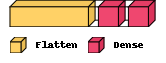

In [ ]:
from visualkeras import layered_view

layered_view(model,legend=True, draw_volume=True,)

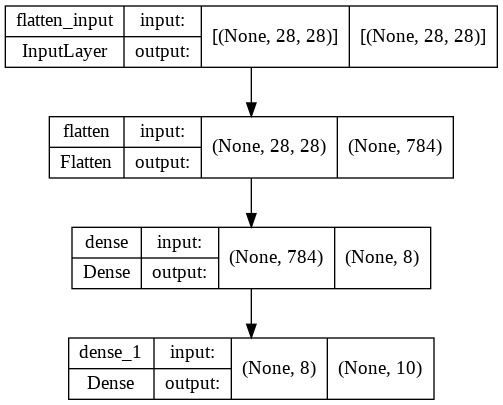

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

## Entrenando la red

Entrenamos la red con el método `fit`, usamos 8 épocas

Observa que, para realizar el entrenamiento, usamos el conjunto de validación también. Este sirve para proporcionar un indicador no sesgado del desempeño del modelo.

<img align="left" width="50%" src="../img/training-validation-test.png"/> 

In [ ]:
n_epocas = 8

history = model.fit(X_train, y_train, epochs=8, validation_data=(X_test,y_test))

Epoch 1/8
1875/1875 [==============================] - 8s 3ms/step - loss: 1.4495 - acc: 0.5556 - val_loss: 1.0066 - val_acc: 0.6610
Epoch 2/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8614 - acc: 0.7316 - val_loss: 0.7631 - val_acc: 0.7664
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7493 - acc: 0.7679 - val_loss: 0.7327 - val_acc: 0.7760
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6909 - acc: 0.7918 - val_loss: 0.6483 - val_acc: 0.8018
Epoch 5/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6604 - acc: 0.7948 - val_loss: 0.6141 - val_acc: 0.8157
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6350 - acc: 0.8111 - val_loss: 0.6156 - val_acc: 0.8117
Epoch 7/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6353 - acc: 0.8124 - val_loss: 0.5871 - val_acc: 0.8241
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - 

Graficamos la función de perdida en cada época, tanto en el conjunto de entrenamiento, como en el de validación.

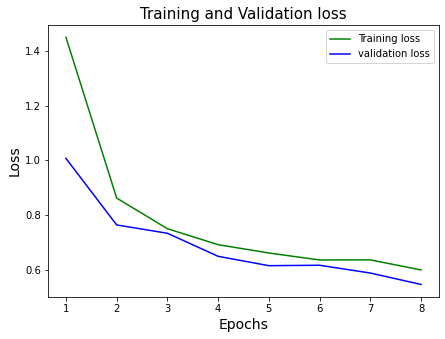

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.legend()
plt.show()

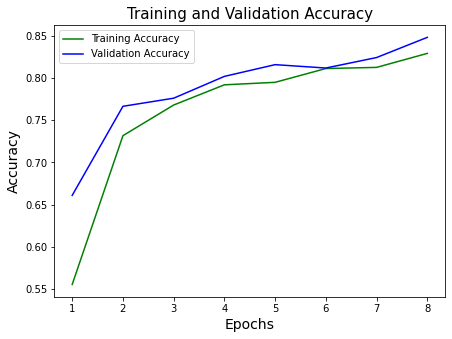

In [ ]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']

epochs = range(1,n_epocas+1)

plt.figure(figsize=(7,5))
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.xticks(epochs)
plt.legend()
plt.show()

De la siguiente forma podemos acceder a la matriz de pesos y sesgos en cada capa. Las guardamos como arreglos de numpy. Son los pesos usados en la notebook anterior.

In [ ]:
first_layer_weights = model.layers[1].get_weights()[0]
first_layer_biases  = model.layers[1].get_weights()[1]

np.save("mnist_weights1.npy",first_layer_weights)
np.save("mnist_biases1.npy",first_layer_biases)

In [ ]:
second_layer_weights = model.layers[2].get_weights()[0]
second_layer_biases  = model.layers[2].get_weights()[1]

np.save("mnist_weights2.npy",second_layer_weights)
np.save("mnist_biases2.npy",second_layer_biases)

## Predicciones y rendimiento

¿Cómo se ven las predicciones?

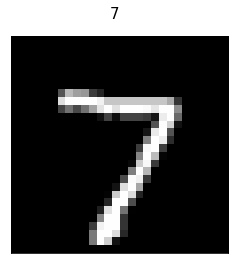

Salida de la red neuronal para este primer elemento:
 [[3.6463575e-03 6.1247949e-05 6.0661905e-04 8.4800279e-04 4.9081161e-03
  1.6879940e-03 1.8377180e-04 9.5941734e-01 8.3446450e-04 2.7806005e-02]]
Son probabilidades, la suma de las entradas es 0.9999998807907104
Tomamos el índice de la entrada con mayor probabilidad: [7]


In [ ]:
x = X_test[0].copy()

# ----- Graficamos este primer ejemplo de prueba:
plt.figure()
plt.suptitle(y_test_original[0],fontsize=15)
plt.imshow(x, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

# ----- Cambiamos a la forma adecuada para entrar a la red neuronal:
x_input = x.reshape(-1,x.shape[0],x.shape[1])

# ----- Lo pasamos por la red neuronal ya entrenada:
prediction = model.predict(x_input)
print(f"Salida de la red neuronal para este primer elemento:\n {prediction}")

print(f"Son probabilidades, la suma de las entradas es {np.sum(prediction)}")

# ----- Tomamos el argmax:
prediction = np.argmax(prediction, axis=1)
print(f"Tomamos el índice de la entrada con mayor probabilidad: {prediction}")

Obtenemos todas las predicciones sobre el conjunto de prueba:

In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

Visualizamos algunas predicciones

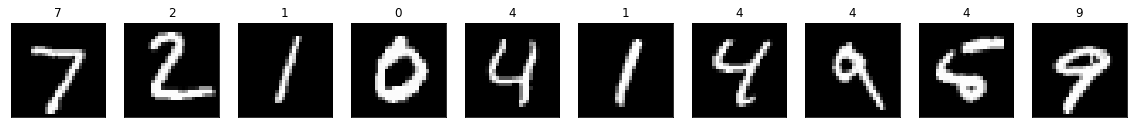

In [ ]:
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

Obtenemos las métricas de desempeño de la tarea de clasificación.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

Test Accuracy: 0.8448
Test Recall: 0.842827856197706
Test Precision: 0.8477836642527485


Mostramos la matriz de confusión

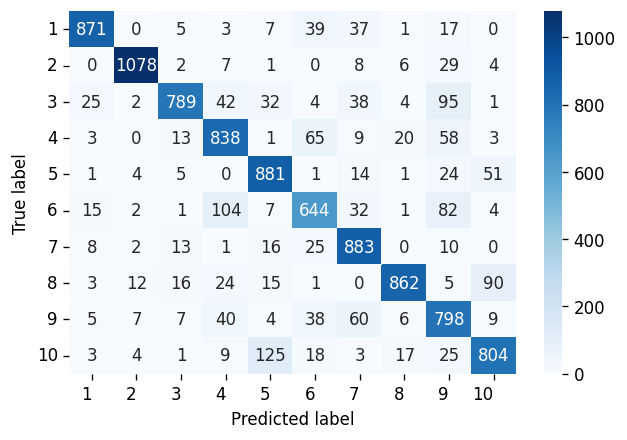

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def show_confusion_matrix(confusion_matrix):
  plt.figure(dpi=120)
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  new_xticks =  [str(int(x.get_text())+1) for x in hmap.xaxis.get_ticklabels()]
  new_yticks =  [str(int(x.get_text())+1) for x in hmap.yaxis.get_ticklabels()]
  hmap.xaxis.set_ticklabels(new_xticks, rotation=0, ha='right')
  hmap.yaxis.set_ticklabels(new_yticks, rotation=0, ha='right')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

cm = confusion_matrix(y_test_original,predictions)
show_confusion_matrix(cm)

⭕ ¿Qué dígitos son los que más confunde la red?

---

⭕ Ejercicio

Cambiando el número neuronas en la capa oculta o el número de épocas, ¿puedes subir las métricas de desempeño?

Como referencia, el mejor resultado hasta ahora, sin usar redes convolucionales, es un accuracy de 99.65% (https://arxiv.org/abs/1003.0358)

Lista de resultados: http://yann.lecun.com/exdb/mnist/